In [28]:
import os,random,cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [41]:
classes={"0": "lianjiao", "1": "shakong", "2": "guoshi", "3": "huashang", "4":"yanghua", "5":"tongheidian", "6":"heidian", "7":"feilinjiao", "8":"wuzi", "9":"yiwu"}
image_name="Padim_results_image_label_for_classification.txt"
choose_label=8
view_list=[]
show_size=3
with open(image_name,"r") as fid:
    image_label=fid.readlines()
    for line in image_label:
        image_name= line.split(" ")[0]
        label= line.split(" ")[-1].strip()
        if int(label)== choose_label:
            view_list.append(line)
    #slices=random.sample(view_dict,show_size**2)
    
block_list=[]
for i in range(0,len(view_list),show_size**2):
    one_block=view_list[i:i+show_size**2]
    block_list.append(one_block)

In [42]:
def get_threshold_from_hist(iamge):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    num_sum=0
    for i in range(256):
        num_sum+=hist[i]
        if num_sum>=224*224*0.9:
            return i

[77224.] [161645.]
[83730.] [144712.]
[31181.] [133718.]
[88998.] [195388.]
[96827.] [125248.]
[122334.] [138925.]
[54996.] [215136.]
[106764.] [156150.]
[79727.] [183152.]


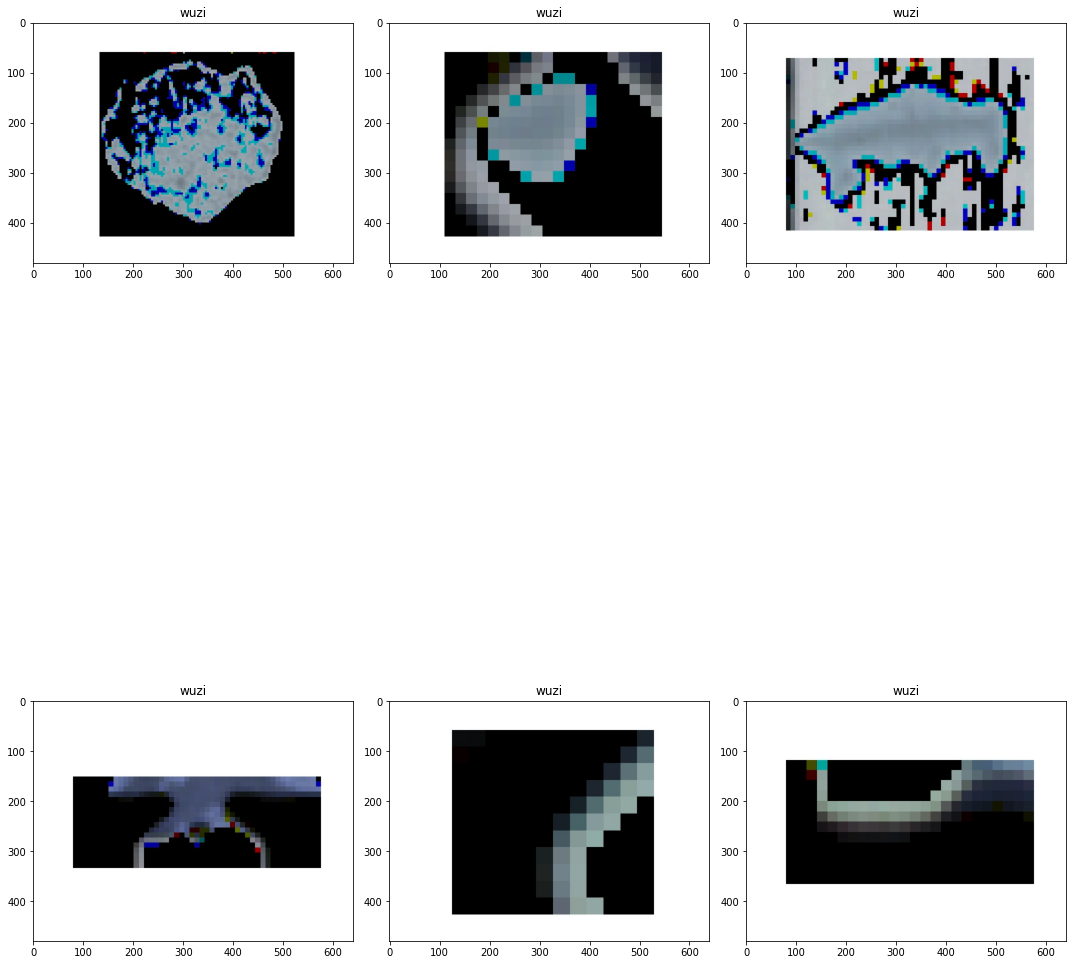

In [44]:
num=1       
for line in block_list[0]:
    image_name= line.split(" ")[0]
    label= line.split(" ")[-1].strip()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15, 15)
    plt.tight_layout()
    image=cv2.imread(os.path.join("/git/PaDiM-master",image_name))
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    print(hist[0],hist[-1])

    i=get_threshold_from_hist(image)
    if np.all(image_array==255):
        print(line)
        continue
    ax=plt.subplot(show_size,show_size,num)
    ax.set_title(classes[str(choose_label)])
    plt.imshow(image)
    num+=1

In [47]:
product_class=['0708DFN-8L', 'DFN-5X6-T-8L', '0420QFN-5X6-8L' ,'1101QFN-40L', '0713DFN-2X3-8L', 'DFN-5X6-8L' ,'1129QFN-4X4-24L','QFN-3X3-16L']
product_id=["0420QFN-5X6-8L", "0708DFN-8L",  "0713DFN-2X3-8L",  "1101QFN-40L",  "1129QFN-4X4-24L", "DFN-5X6-8L", "DFN-5X6-T-8L", "QFN-3X3-16L"]

In [48]:
set(product_class)-set(product_id)

set()